# Code along - Linear Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("../data/Advertising.csv", index_col=0)

df.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## EDA - Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [4]:
df.shape # 200 samples, 3 features, 1 label



(200, 4)

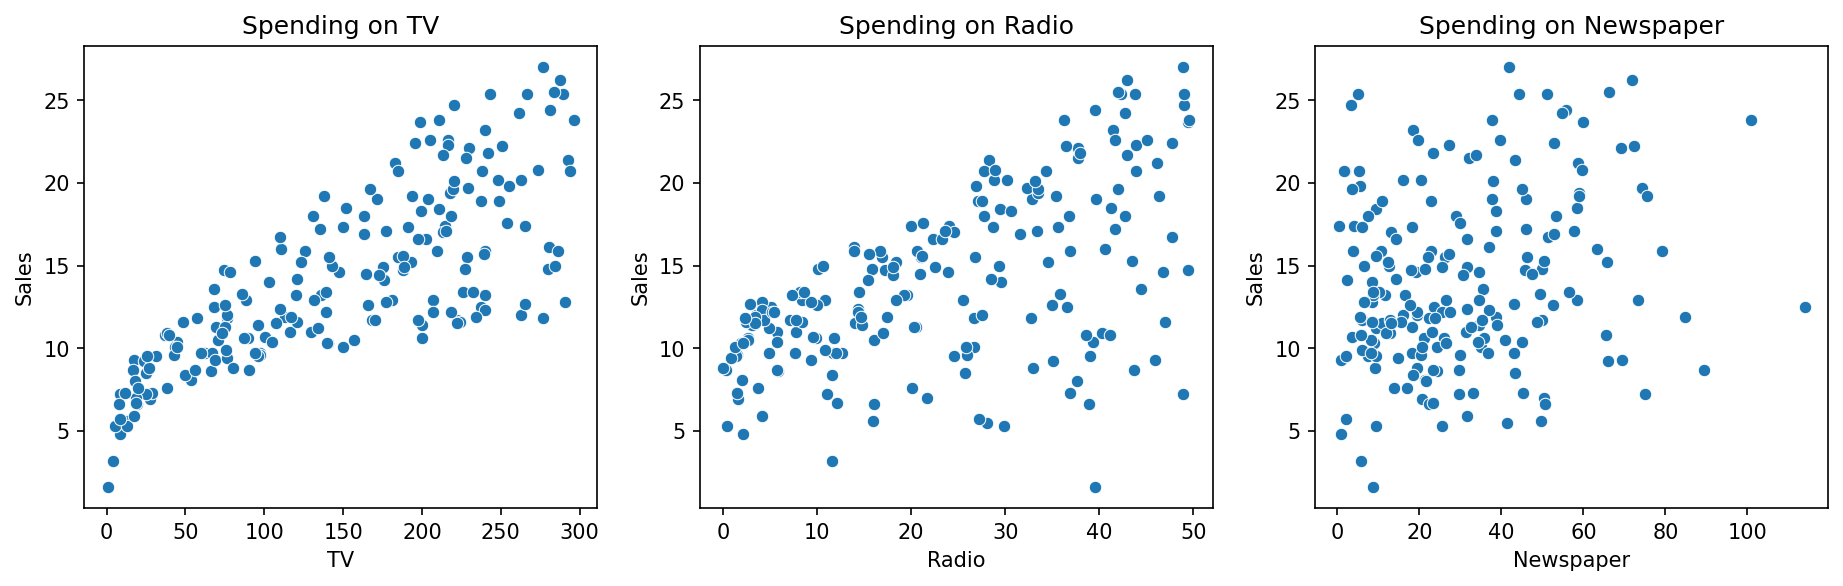

In [5]:
number_features = df.shape[1]-1
# number_features var 4 så tar minus 1 för att få 3 ovan

fig, ax = plt.subplots(1, number_features, figsize=(15, 4), dpi=150)


for i, feature in enumerate(df.columns[:-1]): # alla förutom sales kolumnen
    sns.scatterplot(data = df, x = feature, y = "Sales", ax = ax[i])
    ax[i].set_title(f"Spending on {feature}")

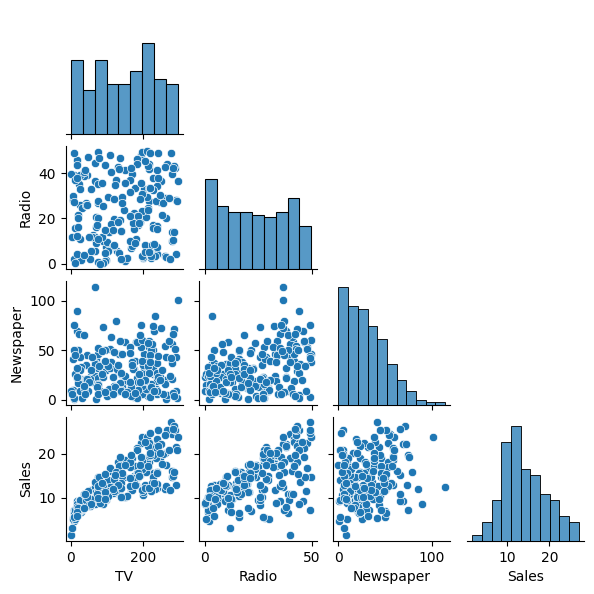

In [6]:
ax = sns.pairplot(df, height = 1.5, corner=True)

## Simple linear regression

1 variabel / feature - TV i nedan exempel

In [7]:
X, y = df["TV"], df["Sales"]

X

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [8]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [9]:
beta_1, beta_0 = np.polyfit(X, y, deg=1)
beta_0, beta_1 # beta_0 = intercept with y-axis, beta_1 = slope of the line

(7.032593549127696, 0.04753664043301972)

Text(0.5, 1.0, 'Regression line on TV advertising and sales')

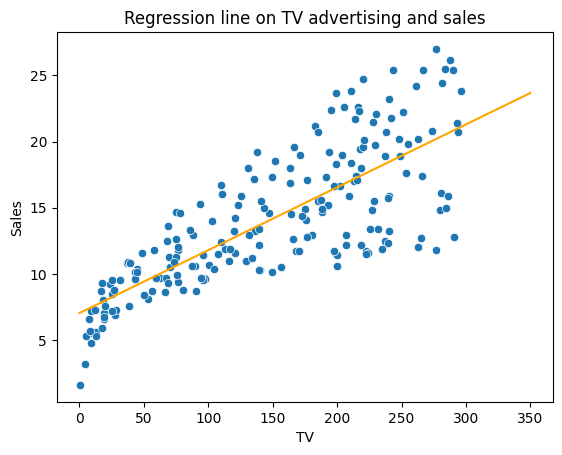

In [10]:
y_hat = lambda x: beta_0 + beta_1 * x

spending = np.linspace(0, 350)

ax = sns.scatterplot(data = df, x = "TV", y = "Sales")
sns.lineplot(x = spending, y = y_hat(spending), color="orange")
ax.set_title("Regression line on TV advertising and sales")

<Axes: xlabel='TV', ylabel='Sales'>

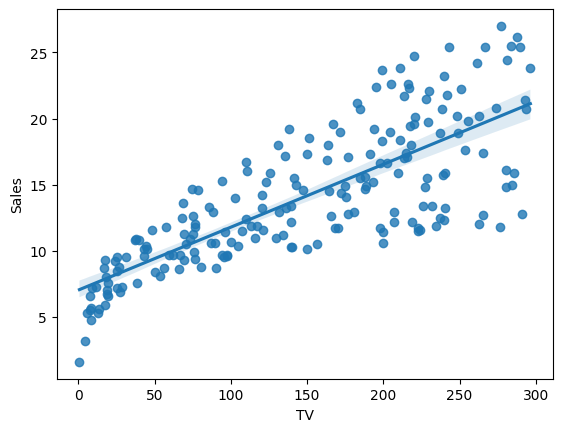

In [11]:
sns.regplot(x=X, y=y)

## Multiple linear regression

Flera variabler / features - TV, Radio, Newspaper i nedan exempel

In [12]:
X,y = df.drop("Sales", axis="columns"), df["Sales"]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [13]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [14]:
X.insert(0, "Intercept", 1) # add a column of ones to X matrix to account for the intercept

In [16]:
# Matrismultiplikation görs med @ i python, kallas för matmul-operator

X.head()

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


In [20]:

# @ operator - matmul operator
# in numpy - the matmul operator is overloaded to handle matrix multiplication
X.T@X # första delen i normalekvationen, X.T@X

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [24]:
# normal equation - OLS

beta_hat = np.linalg.inv(X.T@X)@X.T@y # hela normalekvationen, (X.T@X)^-1@X.T@y
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [26]:
regression_fit = lambda X, y: np.linalg.inv(X.T@X)@X.T@y
beta_hat = regression_fit(X, y)

beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [31]:
predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230, 38, 69]
y_hat = predict(test_sample, beta_hat)
print(f"With $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales of ${y_hat:.1f}k units")

With $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales of $20.6k units


## Train|Test split

In [41]:
train_fraction = int(len(df)*0.7)

# sampla med återläggning eller sampla utan återläggning
# dvs om vi ska använda samma data flera gånger eller inte
# random_state=42 betyder att vi får samma random seed varje gång vi kör koden
train = df.sample(n=train_fraction, random_state=42, replace=False) # replace=False betyder att vi inte vill ha samma data flera gånger
train.head()


,TV,Radio,Newspaper,Sales
96,163.3,31.6,52.9,16.9
16,195.4,47.7,52.9,22.4
31,292.9,28.3,43.2,21.4
159,11.7,36.9,45.2,7.3
129,220.3,49.0,3.2,24.7


In [44]:
test = df.drop(train.index)
train.shape, test.shape

((140, 4), (60, 4))

In [53]:
X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1) # add a column of ones to X matrix to account for the intercept

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 4), (140,), (60, 4), (60,))

## Prediction

In [60]:
beta_hat = regression_fit(X_train, y_train)
print(f"Beta parameters:\n{beta_hat}")

# weights/parameters/beta
predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4, 1)) # reshape to (4, 1) to be able to use matrix multiplication

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5]

Beta parameters:
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [63]:
X_test.iloc[1]
# spending $120.2k on TV, $19.6k on radio and $11.6k on newspaper 
# gives us a predicted sales of 12.19k units

Intercept      1.0
TV           120.2
Radio         19.6
Newspaper     11.6
Name: 8, dtype: float64

## Evaluate model performance

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE) 

In [67]:
m = len(y_test)

# removed extra dimension from y_hat (60, 1) -> (60,)
np.reshape(y_hat, (m)).shape

mean_absolute_error = 

(60,)